<a href="https://colab.research.google.com/github/Abhilash11Addanki/DeepLearning/blob/main/MNIST_Sign_Language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import csv
import tensorflow as tf

In [2]:
def get_data(filename):
  with open(filename) as df:
    images_list,labels_list = [],[]
    csv_reader = csv.reader(df,delimiter=',')
    next(csv_reader)
    for row in csv_reader:
      labels_list.append(row[0])
      images_data = row[1:]
      images_data_as_array = np.array_split(images_data,28)
      images_list.append(images_data_as_array)
    images = np.array(images_list).astype('float')
    labels = np.array(labels_list).astype('float')
  return images,labels

In [3]:
train_images,train_labels = get_data('/content/drive/MyDrive/Deep Learning.AI/sign_mnist_train.csv')
test_images,test_labels = get_data('/content/drive/MyDrive/Deep Learning.AI/sign_mnist_test.csv')

In [4]:
print(train_images.shape,train_labels.shape)
print(test_images.shape,test_labels.shape)

(27455, 28, 28) (27455,)
(7172, 28, 28) (7172,)


In [5]:
train_images = np.expand_dims(train_images,axis = 3)
test_images = np.expand_dims(test_images,axis = 3)

In [6]:
print(train_images.shape)
print(test_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1/255)

train_gen = train_datagen.flow(train_images,train_labels,batch_size = 32)
test_gen = test_datagen.flow(test_images,test_labels,batch_size = 32)

In [8]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(26,activation='softmax')
                                    ])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if logs.get('accuracy')>0.85:
      print('\nReached 85% accuracy so training cancelled')
      self.model.stop_training = True

In [12]:
history = model.fit(train_gen,validation_data=test_gen,epochs = 50,callbacks=[myCallback()])

Epoch 1/50
858/858 [==============================] - 18s 18ms/step - loss: 3.0746 - accuracy: 0.0761 - val_loss: 2.2612 - val_accuracy: 0.2172
Epoch 2/50
858/858 [==============================] - 15s 17ms/step - loss: 2.3463 - accuracy: 0.2501 - val_loss: 1.7340 - val_accuracy: 0.3919
Epoch 3/50
858/858 [==============================] - 15s 18ms/step - loss: 1.9112 - accuracy: 0.3758 - val_loss: 1.2766 - val_accuracy: 0.5388
Epoch 4/50
858/858 [==============================] - 15s 17ms/step - loss: 1.6446 - accuracy: 0.4556 - val_loss: 1.1645 - val_accuracy: 0.5883
Epoch 5/50
858/858 [==============================] - 15s 17ms/step - loss: 1.4887 - accuracy: 0.5076 - val_loss: 0.9761 - val_accuracy: 0.6601
Epoch 6/50
858/858 [==============================] - 15s 17ms/step - loss: 1.3222 - accuracy: 0.5631 - val_loss: 0.9885 - val_accuracy: 0.6322
Epoch 7/50
858/858 [==============================] - 15s 17ms/step - loss: 1.2371 - accuracy: 0.5864 - val_loss: 0.8577 - val_accuracy:

In [13]:
model.evaluate(test_images,test_labels)

225/225 [==============================] - 1s 3ms/step - loss: 194.9906 - accuracy: 0.6828


[194.99061584472656, 0.6827942132949829]

Text(0.5, 1.0, 'Training and validation loss')

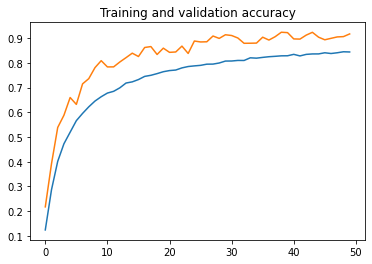

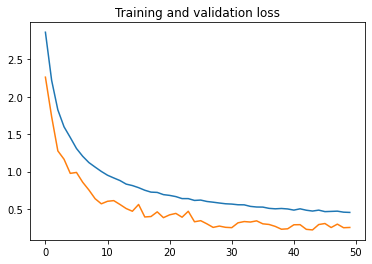

In [15]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

#Plotting training and validation accuracy per epoch
plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title('Training and validation accuracy')
plt.figure()

#Plotting training and validation loss per epoch
plt.plot( epochs,loss)
plt.plot( epochs,val_loss)
plt.title('Training and validation loss')